<a href="https://colab.research.google.com/github/chw8207/ADP-study/blob/master/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5(%EC%98%88%EC%B8%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 회귀분석-정규방정식

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adp실기/ADP-study/data/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


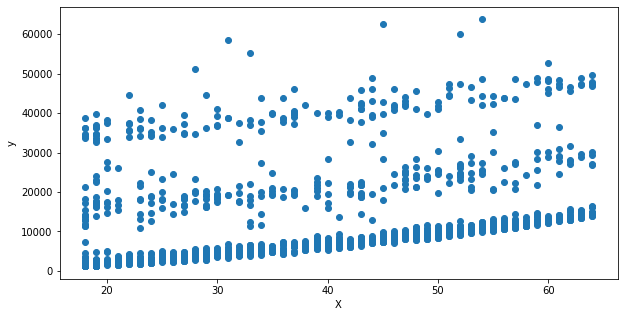

In [ ]:
# 산점도로 선형관계 여부 확인해보기
X=data['age']
y=data['charges']

plt.figure(figsize=(10,5))
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
X = np.array(data['age'])
y = np.array(data['charges'])

# 2차원 array로 차원 맞추기
X = X.reshape(1338,1)
y = y.reshape(1338,1)

# 모델 학습
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [ ]:
# 회귀분석 결과 확인
print('선형 회귀 모델 결과')
print('절편', lr.intercept_, '계수', lr.coef_)

선형 회귀 모델 결과
절편 [3165.88500606] 계수 [[257.72261867]]


In [ ]:
# 결정계수 구하기
print(lr.score(X,y))

0.08940589967885804


In [ ]:
# 새로운 데이터 샘플을 선형 회귀모델에 입력한 뒤 예측
X_new = [[19],[64]]
y_hat = lr.predict(X_new)
print(y_hat)

[[ 8062.61476073]
 [19660.13260074]]


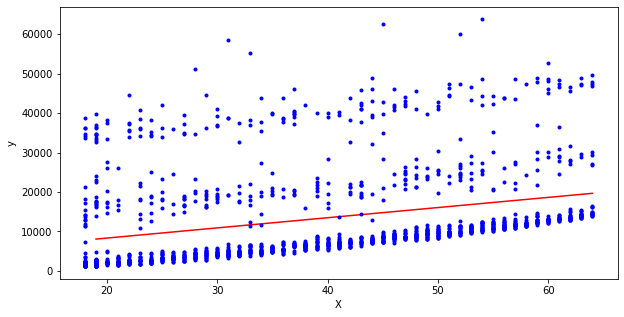

In [ ]:
# 회귀분석 시각화
plt.figure(figsize=(10,5))
plt.plot(X_new, y_hat, '-r')
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### 회귀분석-경사하강법

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

# 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adp실기/ADP-study/data/insurance.csv')

X = np.array(data['age'])
y = np.array(data['charges'])

# print(X.shape, y.shape)
# 2차원 배열로 맞추기
X = X.reshape(1338, 1)
y = y.reshape(1338, 1)

# 모델 학습
sgd_reg = SGDRegressor(max_iter=1000, random_state=34)
sgd_reg.fit(X,y.ravel())

SGDRegressor(random_state=34)

In [ ]:
# 회귀모델 결과
print('SGD 회귀 모델 결과')
print('절편', sgd_reg.intercept_, '계수', sgd_reg.coef_)

SGD 회귀 모델 결과
절편 [6159.32587214] 계수 [89.07765947]


In [ ]:
# 새로운 샘플 입력한 뒤 예측해보기
X_new = [[19],[64]]
y_hat = sgd_reg.predict(X_new)
print(y_hat)

[ 7851.801402   11860.29607798]


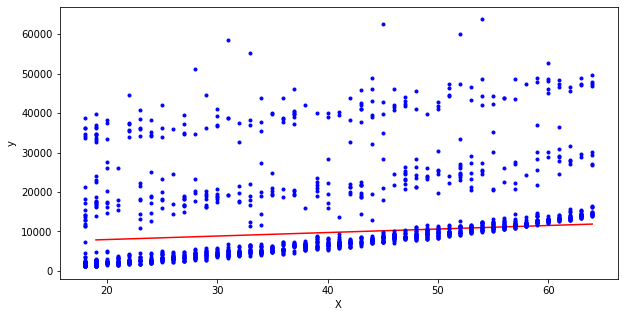

In [ ]:
# 시각화하기
plt.figure(figsize=(10,5))
plt.plot(X_new, y_hat, '-r')
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### 다항회귀

In [ ]:
# 라이브러리 임포트
import pandas as pd

# 데이터 가져오기 및 확인하기
cereal = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adp실기/ADP-study/data/cereal.csv')
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [ ]:
# 전처리
# 1. name, mfr, type 변수 제거하기
cereal = cereal[cereal.columns[3:]]
# 2. 설탕 함유량이 0 이상인 데이터만 추출
cereal = cereal[cereal.sugars>=0]
# 데이터 확인
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


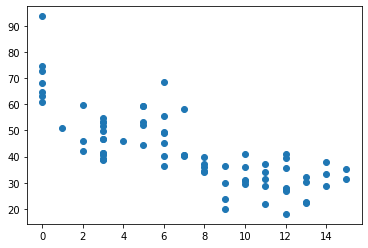

In [ ]:
# sugart변수와 rating변수 사이의 관계 산점도로 확인해보기
import matplotlib.pyplot as plt
cereal2 = cereal[['sugars', 'rating']]
cereal2.reset_index(drop=True, inplace=True)
X = cereal2['sugars'].values
y = cereal2['rating'].values
plt.scatter(X, y)
plt.show()

In [ ]:
# 학습 데이터와 평가 데이터 7:3으로 분할하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=1)

# 크기 확인
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(53,) (23,)
(53,) (23,)


In [ ]:
# PolynomialFeatures로 2차 다항식 조건 생성
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train.reshape(-1,1))

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [ ]:
import numpy as np
X_test_poly = poly_reg.transform(X_test.reshape(-1,1))
pred = reg.predict(X_test_poly)

# 소수점 둘째자리까지 표현 : set_printoptions()이용
np.set_printoptions(precision=2)
print(np.concatenate((pred.reshape(len(pred),1),
                      y_test.reshape(len(y_test),1)),1))

[[38.64 40.45]
 [41.53 49.51]
 [31.16 18.04]
 [52.98 39.11]
 [68.61 63.01]
 [38.64 58.35]
 [52.98 39.24]
 [52.98 53.37]
 [48.7  45.81]
 [52.98 40.56]
 [31.73 37.14]
 [41.53 40.11]
 [44.88 59.43]
 [32.76 30.45]
 [32.76 40.92]
 [34.26 36.47]
 [52.98 41.45]
 [52.98 54.85]
 [31.73 21.87]
 [31.43 28.59]
 [57.73 42.  ]
 [52.98 51.59]
 [41.53 55.33]]


In [ ]:
# 다양한 성능평가지표 확인하기
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test.reshape(-1,1)), y_test)

print(f'MSE\t{mse:.3f}')
print(f'MAE\t{mae:.3f}')
print(f'RMSE\t{rmse:.3f}')
print(f'ACC\t{acc*100:.3f}%')

MSE	95.837
MAE	7.940
RMSE	9.790
ACC	26.497%


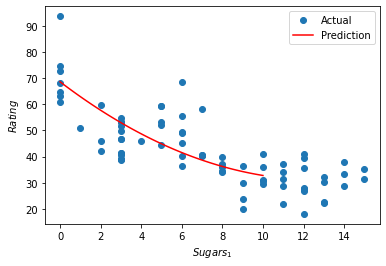

In [ ]:
# 시각화하기
X_new = np.linspace(0,10,100).reshape(100,1)
X_new_poly = poly_reg.transform(X_new)
y_new = reg.predict(X_new_poly)

plt.plot(X, y, 'o', label = 'Actual')
plt.plot(X_new, y_new, 'r-', label = 'Prediction')
plt.legend(loc = 'upper right')
plt.xlabel('$Sugars_1$')
plt.ylabel('$Rating$')

plt.show()

In [ ]:
# 고차 다항 회귀분석 코드 실습
X = cereal.iloc[:,:-1].values
y = cereal.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(53, 12) (23, 12)
(53,) (23,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

from sklearn.linear_model import LinearRegression
X_poly = poly_reg.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [ ]:
# 성능평가 결과 확인하기
import numpy as np
X_test_poly = poly_reg.transform(X_test)
pred = reg.predict(X_test_poly)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test), y_test)
print(f'MSE\t{mse:.3f}')
print(f'MAE\t{mae:.3f}')
print(f'RMSE\t{rmse:.3f}')
print(f'ACC\t{acc*100:.3f}%')

MSE	8.892
MAE	2.112
RMSE	2.982
ACC	93.181%


### 다중 회귀-릿지함수

In [ ]:
# 라이브러리 임포트
from sklearn.datasets import load_diabetes
import pandas as pd

# 데이터 가져오기
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
y = diabetes.target

# 데이터 확인하기
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
from sklearn.linear_model import Ridge
import numpy as np

# 릿지 회귀계수를 데이터프레임에 저장하여
# df_ridge로 출력하기
alpha = np.logspace(-3,1,5)
data = []

for i, a in enumerate(alpha) : 
  ridge = Ridge(alpha=a)
  ridge.fit(X,y)
  data.append(pd.Series(np.hstack([ridge.coef_])))

df_ridge = pd.DataFrame(data, index=alpha)
df_ridge.columns = X.columns
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.551414,-239.090354,520.363367,323.828627,-712.328205,413.383794,65.811629,167.513774,720.944468,68.122100
0.010,-7.199457,-234.552930,520.583136,320.523356,-380.607066,150.483752,-78.591232,130.313059,592.349587,71.133768
0.100,1.307349,-207.194814,489.691080,301.769437,-83.466074,-70.828096,-188.680164,115.712703,443.814054,86.748539
1.000,29.465746,-83.154885,306.351627,201.629434,5.909369,-29.515927,-152.040465,117.311715,262.944995,111.878718
10.000,19.812822,-0.918458,75.416167,55.025419,19.924600,13.948686,-47.553816,48.259420,70.144068,44.213876


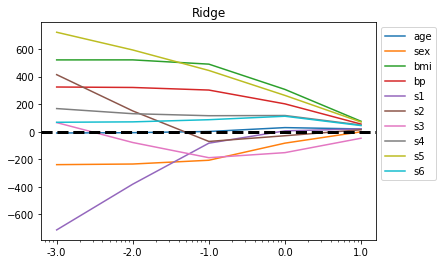

In [ ]:
# 시각화하기
import matplotlib.pyplot as plt

plt.semilogx(df_ridge)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1,1))
plt.title('Ridge')
plt.xlabel = 'alpha'
plt.ylabel = 'Coefficient (size)'
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

plt.show()

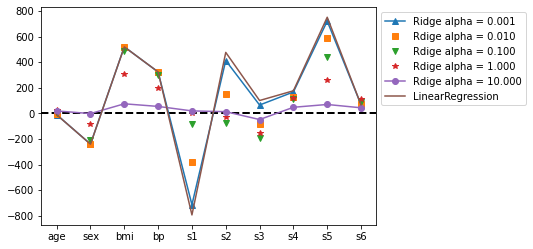

In [ ]:
# a=0인 회귀모형
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

# 시각화
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ridge.loc[0.001], '^-', label = 'Ridge alpha = 0.001')
plt.plot(df_ridge.loc[0.010], 's', label = 'Rdige alpha = 0.010')
plt.plot(df_ridge.loc[0.100], 'v', label = 'Rdige alpha = 0.100')
plt.plot(df_ridge.loc[1.000], '*', label = 'Rdige alpha = 1.000')
plt.plot(df_ridge.loc[10.000], 'o-', label = 'Rdige alpha = 10.000')

plt.plot(lr.coef_, label = 'LinearRegression')
plt.xlabel = ('Feature Names')
plt.ylabel = ('Coefficeint (size)')
plt.legend(bbox_to_anchor=(1,1))

plt.show()

### 다중 회귀-라쏘함수

In [ ]:
from sklearn.linear_model import Lasso

alpha = np.logspace(-3,1,5)

data = []
for i, a in enumerate(alpha) : 
  lasso = Lasso(alpha=a)
  lasso.fit(X, y)
  data.append(pd.Series(np.hstack([lasso.coef_])))

df_lasso = pd.DataFrame(data, index=alpha)
df_lasso.columns = X.columns
df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.998449,-238.899740,520.261362,323.429484,-720.251734,421.405141,66.734168,164.448873,725.340440,67.475538
0.010,-1.306575,-228.822331,525.560658,316.175320,-307.013677,89.321688,-105.081398,119.597989,571.330871,65.007316
0.100,-0.000000,-155.362882,517.182017,275.082351,-52.540269,-0.000000,-210.159753,0.000000,483.914409,33.672821
1.000,0.000000,-0.000000,367.701852,6.301904,0.000000,0.000000,-0.000000,0.000000,307.605700,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


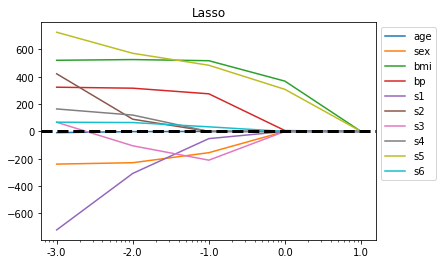

In [ ]:
# 시각화
plt.semilogx(df_lasso)
plt.xticks(alpha, labels = np.log10(alpha))
plt.legend(labels=df_lasso.columns, bbox_to_anchor=(1,1))
plt.title('Lasso')
plt.xlabel = 'alpha'
plt.yalbel = 'Coefficeint (size)'
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

plt.show()

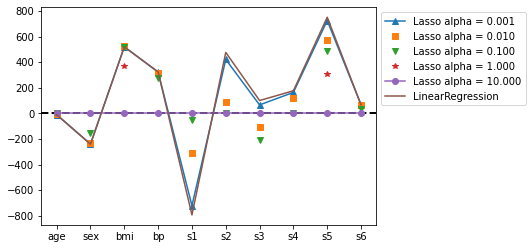

In [ ]:
# a=0인 회귀모형
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

# 시각화
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)

plt.plot(df_lasso.loc[0.001], '^-', label='Lasso alpha = 0.001')
plt.plot(df_lasso.loc[0.010], 's', label='Lasso alpha = 0.010')
plt.plot(df_lasso.loc[0.100], 'v', label='Lasso alpha = 0.100')
plt.plot(df_lasso.loc[1.000], '*', label='Lasso alpha = 1.000')
plt.plot(df_lasso.loc[10.000], 'o-', label='Lasso alpha = 10.000')

plt.plot(lr.coef_, label='LinearRegression')
plt.xlabel = 'Feature Names'
plt.ylabel = 'Coefficeint (size)'
plt.legend(bbox_to_anchor=(1,1))

plt.show()

### 다중 회귀-엘라스틱넷

In [ ]:
from sklearn.linear_model import ElasticNet

alpha = np.logspace(-3,1,5)

data = []
for i, a in enumerate(alpha) : 
  ela = ElasticNet(alpha=a, l1_ratio=0.5)
  ela.fit(X, y)
  data.append(pd.Series(np.hstack([ela.coef_])))

df_ela = pd.DataFrame(data, index = alpha)
df_ela.columns = X.columns
df_ela

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.705295,-178.076275,450.881224,281.072686,-44.049984,-77.944846,-188.958313,119.794742,393.703478,98.943695
0.010,33.147202,-35.245609,211.023930,144.560115,21.931533,0.000000,-115.620017,100.658838,185.326334,96.257214
0.100,10.286327,0.285976,37.464643,27.544899,11.108850,8.355884,-24.120808,25.505488,35.465757,22.894981
1.000,0.359018,0.000000,3.259767,2.204356,0.528646,0.250935,-1.861363,2.114454,3.105841,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


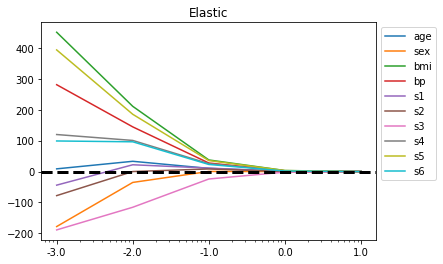

In [ ]:
# 시각화
plt.semilogx(df_ela)
plt.xticks(alpha, labels = np.log10(alpha))
plt.legend(labels=df_ela.columns, bbox_to_anchor=(1,1))
plt.title('Elastic')
plt.xlabel = 'alpha'
plt.ylabel = 'Coefficient (size)'
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

plt.show()

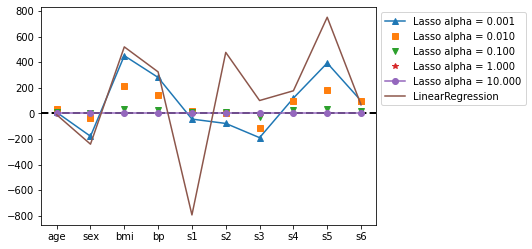

In [ ]:
# a=0인 회귀모형
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

# 시각화
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)

plt.plot(df_ela.loc[0.001], '^-', label='Lasso alpha = 0.001')
plt.plot(df_ela.loc[0.010], 's', label='Lasso alpha = 0.010')
plt.plot(df_ela.loc[0.100], 'v', label='Lasso alpha = 0.100')
plt.plot(df_ela.loc[1.000], '*', label='Lasso alpha = 1.000')
plt.plot(df_ela.loc[10.000], 'o-', label='Lasso alpha = 10.000')

plt.plot(lr.coef_, label='LinearRegression')
plt.xlabel = 'Feature Names'
plt.ylabel = 'Coefficeint (size)'
plt.legend(bbox_to_anchor=(1,1))

plt.show()

### scikit-learn의 SVR

In [5]:
import numpy as np

# 샘플 데이터 생성하기
X = np.sort(5*np.random.rand(40,1), axis=0)
y = np.sin(X).ravel()

print(X[0:6], '\n\n',y[0:10])

[[0.30865444]
 [0.60427217]
 [0.60885449]
 [0.71461562]
 [0.90703693]
 [0.94296586]] 

 [0.30377694 0.56816328 0.57192817 0.65532712 0.7876817  0.80930378
 0.89920471 0.91834541 0.97929169 0.98300278]


In [6]:
# 타킷데이터에 노이즈 추가하기
y[::5] += 3*((0.5-np.random.rand(8)))

print(y[0:10])

[1.37599933 0.56816328 0.57192817 0.65532712 0.7876817  1.12555512
 0.89920471 0.91834541 0.97929169 0.98300278]


In [10]:
from sklearn.svm import SVR

# 회귀모델 적합시키기
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.1,
               coef0=1)

svr_rbf.fit(X,y)
svr_lin.fit(X,y)
svr_poly.fit(X,y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [16]:
# 예측값 생성
rbf_pred = svr_rbf.predict(X)
lin_pred = svr_lin.predict(X)
poly_pred = svr_poly.predict(X)

# 평가하기
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Random_Forest', 'Linear', 'Polynomial']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index=kernel, columns=evls)

for pred, nm in zip(preds, kernel) : 
  mse = mean_squared_error(y, pred)
  mae = mean_absolute_error(y, pred)
  rmse = np.sqrt(mse)

  results.loc[nm]['mse'] = round(mse,2)
  results.loc[nm]['rmse'] = round(rmse,2)
  results.loc[nm]['mae'] = round(mae,2)

results

,mse,rmse,mae
Random_Forest,0.12,0.35,0.2
Linear,0.16,0.4,0.3
Polynomial,0.13,0.36,0.2


In [17]:
import matplotlib.pyplot as plt

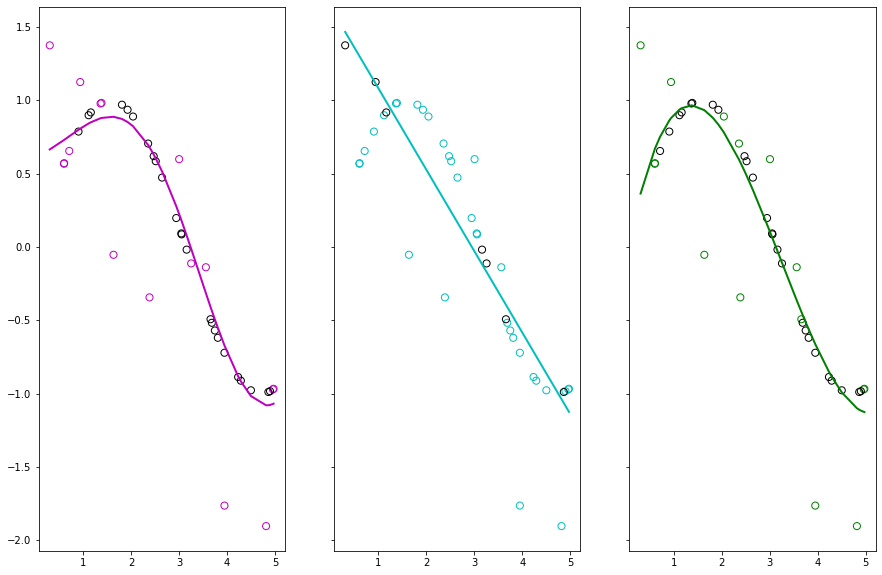

In [35]:
# 데이터 시각화

# lw : line width
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,10),sharey=True)
for ix, svr in enumerate(svrs) : 
  axes[ix].plot(X, svr.fit(X,y).predict(X), color=model_color[ix],
                lw=lw, label=f'{kernel_label[ix]} model')
  
  axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor='none',
                   edgecolor=model_color[ix], s=50,
                   label=f'{kernel_label[ix]} support vectors')
  
  axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                   y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                   facecolor='none',
                   edgecolor='k', s=50,
                   label = 'other training data')
  
plt.show()